# Analyzing Movie Data by Ratings

Melissa Chen, mmc324

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
movie_data = pd.read_csv('my_movie_data.csv')
movie_data.head()

,title,year,duration,imdb_score,genres,num_reviews,director,actor_1_name,actor_2_name,actor_3_name,users_voted,num_genres,ranking
0,Avatar,2009.0,178.0,7.9,Action|Adventure|Fantasy|Sci-Fi,3054.0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,886204,4,188.5
1,Pirates of the Caribbean: At World's End,2007.0,169.0,7.1,Action|Adventure|Fantasy,1238.0,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,471220,3,1023.0
2,Spectre,2015.0,148.0,6.8,Action|Adventure|Thriller,994.0,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,275868,3,1463.0
3,The Dark Knight Rises,2012.0,164.0,8.5,Action|Thriller,2701.0,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,1144337,2,22.0
4,John Carter,2012.0,132.0,6.6,Action|Adventure|Sci-Fi,738.0,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,212204,3,1806.0


# Plot

## Year vs Count
I want to analyze the movie data with reference to the year that the movies were released. I will look at the trend in year, and the number of movies produced that year and also the distribution of scores per year. 

In [3]:
#Every unique year from 1996-2016
movie_data["year"].unique()


array([2009., 2007., 2015., 2012., 2010., 2016., 2006., 2008., 2013.,
       2011., 2014., 2005., 1997., 2004., 1999., 2003., 2001., 2002.,
       1998., 2000., 1996.])

__Bar Graph of Number of movies per Year__

I am plotting the year of the movie vsersus the number of movies in that year.

<class 'numpy.float64'>


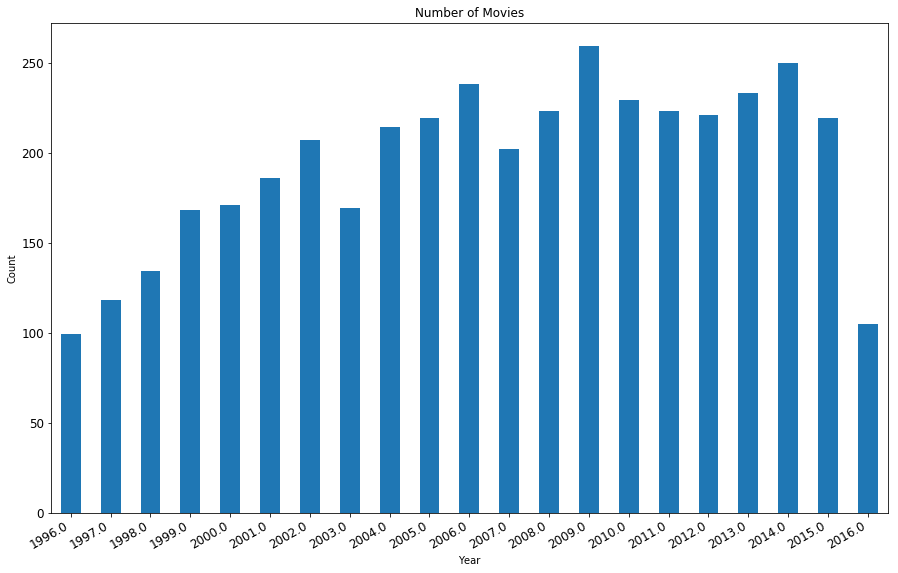

In [4]:
num_movies = movie_data["year"].value_counts().sort_index(axis=0).plot(kind= "bar", rot = 0, figsize = (15, 10), fontsize = 12, title = "Number of Movies");
num_movies.set_xlabel("Year")
num_movies.set_ylabel("Count")
print(type(movie_data["year"][0]))
plt.gcf().autofmt_xdate()



__Analysis__: There appears to be a higher count in the 2000s, than from 1996-1999. The year 2009 had the highers count of movies. The early 2000s, from 2001-2004, also had lower movie counts. Surprisingly 2016, had the second lowest number of movies.

__Boxplot of Scores for Every Year__

I am looking to see if there is a trend in change in year and movie length.

/Applications/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0,0.5,'Score')

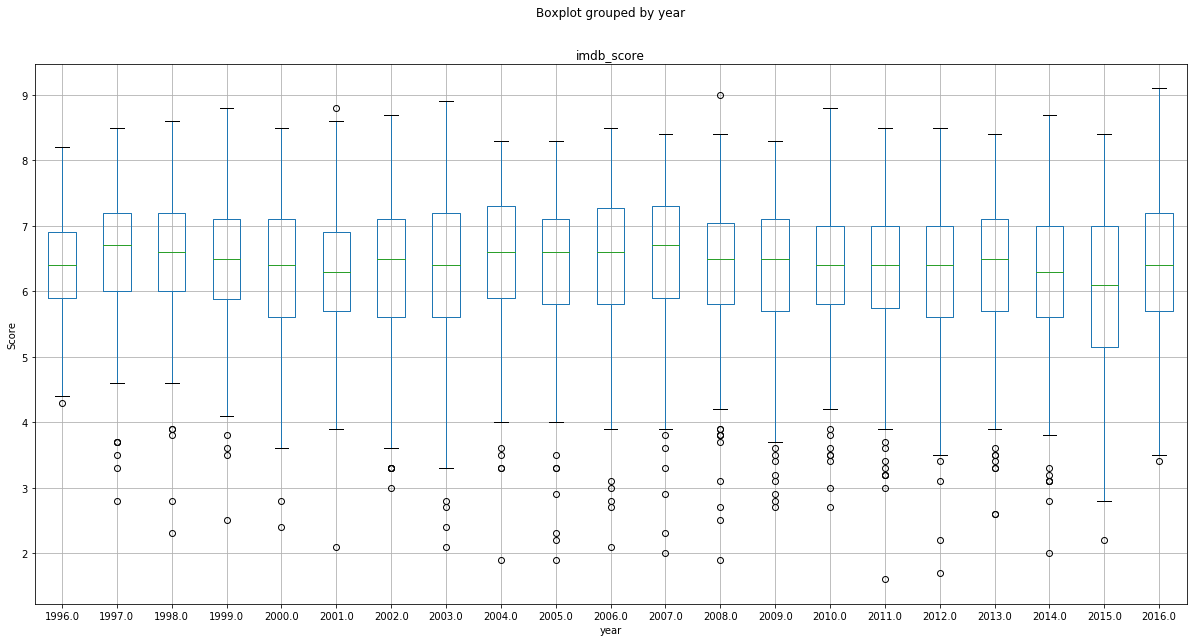

In [5]:
box = movie_data.boxplot(column = "imdb_score", by = "year", figsize = (20, 10))
box.set_ylabel("Score")

__Analysis__: The median rating for every year is around the same value. There does not appear to be a significant difference in scores by the year. 

## Duration vs Score
I am looking the duration of the movie versus the ratings. I am looking to see if there is an optimal movie length that correlates to a higher rating. I will look at the relationship between duration and score, as well as the year with the duration.

__Scatter Plot of Movie Duration and Average IMDb Score__

I will use a scatterplot to look at the trend in length of movie and the average score.

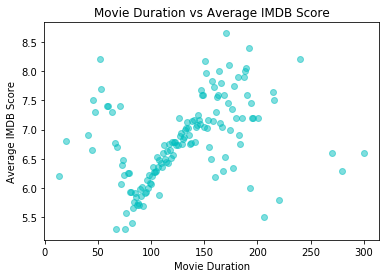

In [6]:
list_dur = np.sort(movie_data["duration"]) 
list_count = pd.unique(list_dur)
list_group = [movie_data.where(movie_data["duration"] == i) for i in list_count]
avg_list = [i.imdb_score.mean() for i in list_group]
plt.scatter(list_count, avg_list, alpha = 0.5, color = 'c')
plt.xlabel("Movie Duration")
plt.ylabel("Average IMDB Score")
plt.title("Movie Duration vs Average IMDB Score")
plt.savefig('durationvscore.png')

In [7]:
dur_score_p = movie_data["duration"].corr(movie_data["imdb_score"], method = "pearson")
dur_score_s = movie_data["duration"].corr(movie_data["imdb_score"], method = "spearman")
dur_score_cov = movie_data["duration"].cov(movie_data["imdb_score"])
print("The Pearson Correlation between movie length and rating: {:.2f}".format(dur_score_p))
print("The Spearman Correlation between movie length and rating: {:.2f}".format(dur_score_s))
print("The Covariance between movie length and rating: {:.2f}".format(dur_score_cov))

The Pearson Correlation between movie length and rating: 0.34
The Spearman Correlation between movie length and rating: 0.36
The Covariance between movie length and rating: 7.46


__Analysis__: There appears to be a linear trend in the scatter points from 90-150, but the points around them do not look linear in trend. The Pearson correlation score is 0.33 and the Spearman Correlation is 0.36. These values indicate a weak, direct linear relationship.

__Boxplot Between Year and Duration of Movies__

I am looking at the distribution of duration per year and seeing if there is a trend.

/Applications/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0,0.5,'Duration')

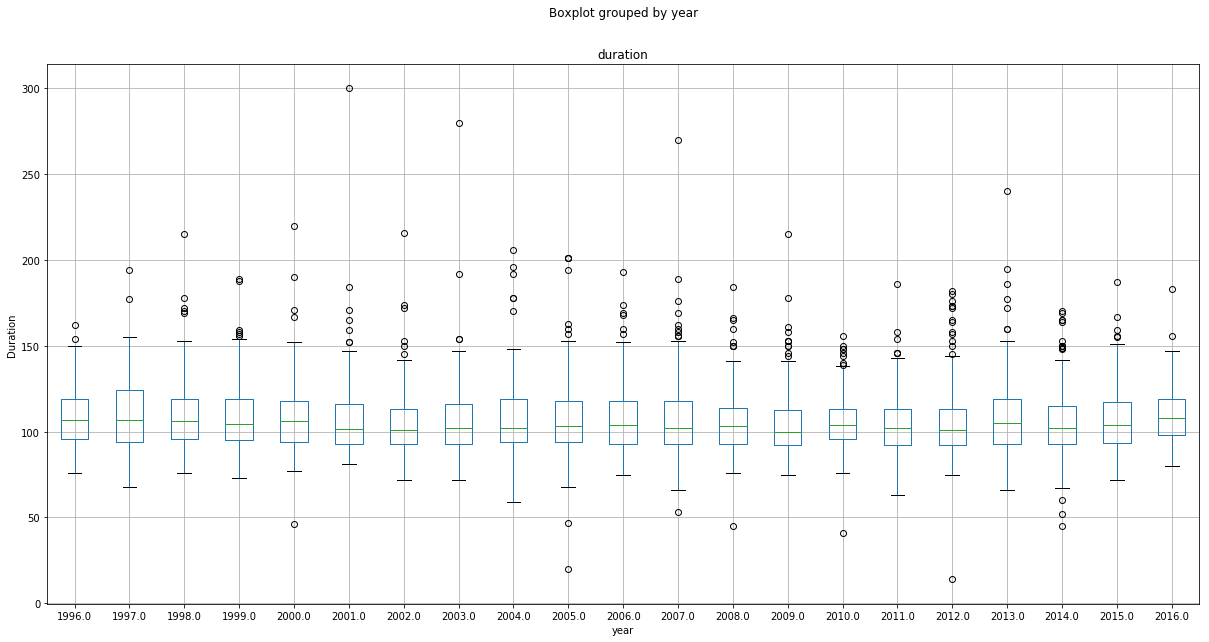

In [8]:
dur_box = movie_data.boxplot(column = "duration", by = "year", figsize = (20, 10))
dur_box.set_ylabel("Duration")


__Analysis__: The distribution of duration is around the same per year. For most years, the data is centered around just above 100 minutes in length. 

Score:  0.20866380602194834


Text(0.5,1,'Duration vs Average Score')

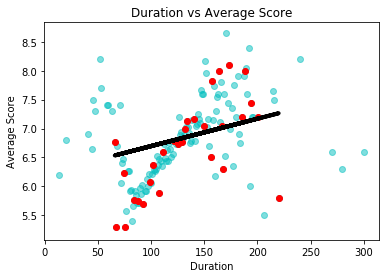

In [9]:
dur = pd.DataFrame(list_count, columns = ["duration"])
dur["avg_score"] = avg_list
feat_d =  dur[["duration"]]
target_d = dur["avg_score"]

x_train_d,x_test_d, y_train_d, y_test_d = train_test_split(feat_d, target_d, test_size = 0.2, random_state = 42)

duration_model = LinearRegression()
duration_model.fit(x_train_d, y_train_d)
predict = duration_model.predict(x_test_d)

print("Score: ", duration_model.score(x_test_d, y_test_d))

# plt.scatter(list_count, avg_list, alpha = 0.5, color = 'c')
# plt.xlabel("Movie Duration")
# plt.ylabel("Average IMDB Score")
# plt.title("Movie Duration vs Average IMDB Score") 

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(list_count, avg_list, alpha = 0.5, color = 'c')
ax.scatter(x_test_d, y_test_d, color = 'r')
plt.plot(x_test_d, predict, 'k', linewidth = 4)
plt.xlabel("Duration")
plt.ylabel("Average Score")
plt.title("Duration vs Average Score")


## Number of Reviews vs Score
In this section I am looking at the trend between the number of reviews given on a movie and the rating. 

__Scatterplot of Number of Reviews vs Score__

Pearson Correlation: 0.31
Spearman Correlation: 0.33
Covariance: 133.09


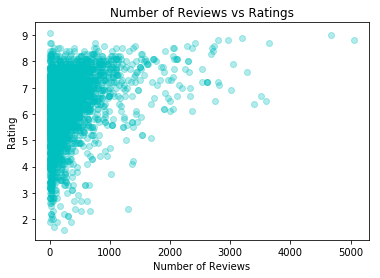

In [10]:
plt.scatter(movie_data.num_reviews, movie_data.imdb_score, alpha = 0.3, color = 'c')
plt.xlabel("Number of Reviews")
plt.ylabel("Rating")
plt.title("Number of Reviews vs Ratings")

rev_score_p = movie_data["num_reviews"].corr(movie_data["imdb_score"], method = "pearson")
rev_score_s = movie_data["num_reviews"].corr(movie_data["imdb_score"], method = "spearman")
rev_score_cov = movie_data["num_reviews"].cov(movie_data["imdb_score"])
print("Pearson Correlation: {:.2f}".format(rev_score_p))
print("Spearman Correlation: {:.2f}".format(rev_score_s))
print("Covariance: {:.2f}".format(rev_score_cov))

__Analysis__: There does not seem to be a strong linear relationship between the number of reviews and ratings. There is a large clustering at the lower number of reviews. 

__Scatterplots of log and square root__

Pearson Correlation: 0.30
Spearman Correlation: 0.33
Covariance: 0.47


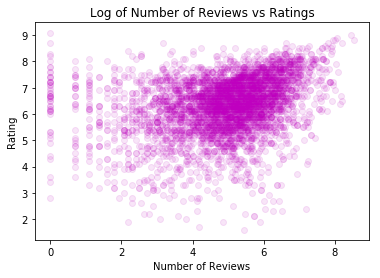

In [11]:
plt.scatter(np.log(movie_data.num_reviews), movie_data.imdb_score, alpha = 0.1, color = 'm')
plt.xlabel("Number of Reviews")
plt.ylabel("Rating")
plt.title("Log of Number of Reviews vs Ratings")

log_score_p = np.log(movie_data["num_reviews"]).corr(movie_data["imdb_score"], method = "pearson")
log_score_s = np.log(movie_data["num_reviews"]).corr(movie_data["imdb_score"], method = "spearman")
log_score_cov = np.log(movie_data["num_reviews"]).cov(movie_data["imdb_score"])
print("Pearson Correlation: {:.2f}".format(log_score_p))
print("Spearman Correlation: {:.2f}".format(log_score_s))
print("Covariance: {:.2f}".format(log_score_cov))

Pearson Correlation: 0.34
Spearman Correlation: 0.33
Covariance: 3.36


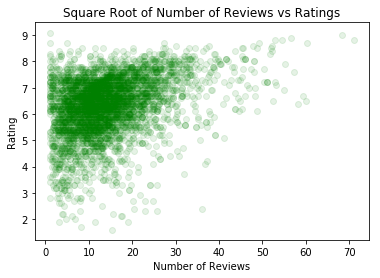

In [12]:
plt.scatter(np.sqrt(movie_data.num_reviews), movie_data.imdb_score, alpha = 0.1, color = 'g')
plt.xlabel("Number of Reviews")
plt.ylabel("Rating")
plt.title("Square Root of Number of Reviews vs Ratings")

sqrt_score_p = np.sqrt(movie_data["num_reviews"]).corr(movie_data["imdb_score"], method = "pearson")
sqrt_score_s = np.sqrt(movie_data["num_reviews"]).corr(movie_data["imdb_score"], method = "spearman")
sqrt_score_cov = np.sqrt(movie_data["num_reviews"]).cov(movie_data["imdb_score"])
print("Pearson Correlation: {:.2f}".format(sqrt_score_p))
print("Spearman Correlation: {:.2f}".format(sqrt_score_s))
print("Covariance: {:.2f}".format(sqrt_score_cov))

__Analysis__: The correlations when taking the logarithmic value of the reviews are 0.29 and 0.33. The Pearson correlation is lowered. There is a big change in covariance from 132.29 to 0.46. When taking the square root of the number of reviews, the Pearson and spearman correlations become 0.34 and 0.33, respectively. The covariance also decreases from the original value to 3.33.

## Number of Votes vs Reviews
In this section I will examine the relationship between the number of votes for the ratings and the number of reviews. I expect a strong relationship between the number of votes and number of reviews because people who leave a review will most likely vote on the rating as well. 

__Scatter Plot of Number Users Voted and Number of Reviews__

I am plotting the number of users who voted and the number of reviews for the movies. 

Text(0.5,1,'Number of Users Voted vs Number of Reviewers')

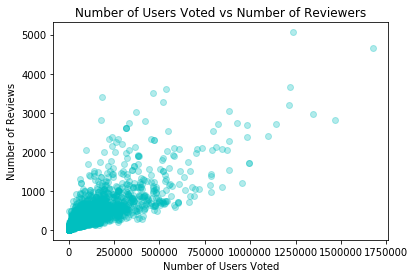

In [13]:
plt.scatter(movie_data["users_voted"], movie_data["num_reviews"], alpha = 0.3, color = 'c')
plt.xlabel("Number of Users Voted")
plt.ylabel("Number of Reviews")
plt.title("Number of Users Voted vs Number of Reviewers")

In [14]:
vote_rev_p = movie_data["users_voted"].corr(movie_data["num_reviews"], method = "pearson")
vote_rev_s = movie_data["users_voted"].corr(movie_data["num_reviews"], method = "spearman")
vote_rev_cov = movie_data["users_voted"].cov(movie_data["num_reviews"])
print("Pearson Correlation: {:.2f}".format(vote_rev_p))
print("Spearman Correlation: {:.2f}".format(vote_rev_s))
print("Covariance: {:.2f}".format(vote_rev_cov))

Pearson Correlation: 0.81
Spearman Correlation: 0.90
Covariance: 42877046.54


__Scatter Plot of Number Users Voted and IMDb Score__

Pearson Correlation: 0.43
Spearman Correlation: 0.40
Covariance: 62829.69


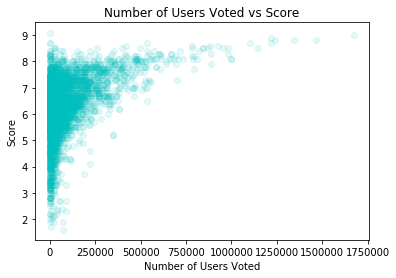

In [15]:
plt.scatter(movie_data["users_voted"], movie_data["imdb_score"], alpha = 0.1, color = 'c')
plt.xlabel("Number of Users Voted")
plt.ylabel("Score")
plt.title("Number of Users Voted vs Score")

vote_score_p = movie_data["users_voted"].corr(movie_data["imdb_score"], method = "pearson")
vote_score_s = movie_data["users_voted"].corr(movie_data["imdb_score"], method = "spearman")
vote_score_cov = movie_data["users_voted"].cov(movie_data["imdb_score"])
print("Pearson Correlation: {:.2f}".format(vote_score_p))
print("Spearman Correlation: {:.2f}".format(vote_score_s))
print("Covariance: {:.2f}".format(vote_score_cov))

## Average Score with Number of Reviews per Year

Pearson Correlation: 0.25
Spearman Correlation: 0.24
Covariance: 2.32


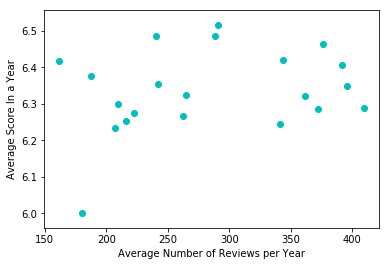

In [16]:
##For every year calculate average Score and number of reviews
score_mean = movie_data.groupby(by = "year").imdb_score.mean()
review_mean = movie_data.groupby(by = "year").num_reviews.mean()

subset = score_mean.to_frame(name = "score_mean").reset_index()
subset["review_mean"] = review_mean.values
plt.scatter(subset["review_mean"], subset["score_mean"], color = 'c')
plt.xlabel("Average Number of Reviews per Year")
plt.ylabel("Average Score In a Year")

print("Pearson Correlation: {:.2f}".format(score_mean.corr(review_mean, method = "pearson")))
print("Spearman Correlation: {:.2f}".format(score_mean.corr(review_mean, method = "spearman")))
print("Covariance: {:.2f}".format(score_mean.cov(review_mean)))

## Number of Genres vs Score
In this section I am looking at the average score for each number of genres, as well as the number of reviews and votes for each number of genres. I expect that as genres increase, the number of reviews and voters will increase because the movie appeals to more people's interests. 


__Bar Graph of Number of Genres vs Score__

Text(0.5,1,'Number of Genres vs Average Score')

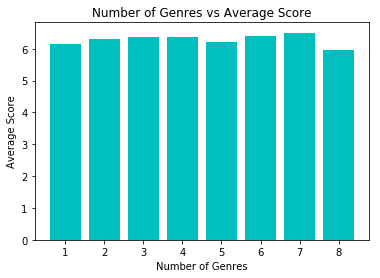

In [17]:
genre_score_mean = movie_data.groupby(by = "num_genres").imdb_score.mean()

genre_data = genre_score_mean.to_frame(name = "mean_score").reset_index()
genre_data.head()


plt.bar(genre_data["num_genres"], genre_data["mean_score"], color = 'c')
plt.xlabel("Number of Genres")
plt.ylabel("Average Score")
plt.title("Number of Genres vs Average Score")

__Analysis__: The average scores for the number of genres does not seem to vary by a lot per genre. The scores do not vary by the number of genres. 

__Boxplot of Number of Genres and Score__

/Applications/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0,0.5,'Score')

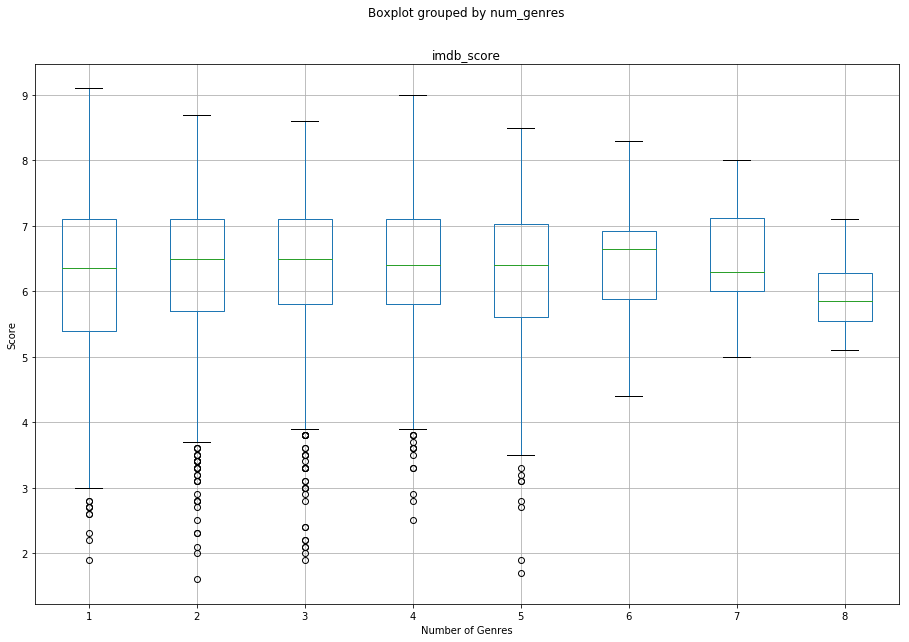

In [18]:
genre_box = movie_data.boxplot(column = "imdb_score", by = "num_genres", figsize = (15, 10))
genre_box.set_xlabel("Number of Genres")
genre_box.set_ylabel("Score")

__Analysis__: There is not large difference in the distribution for genres up to 5. As genres increase to 8 genres, the data appears to be less spread and centered around the median. 

__Bar Graphs of Genres vs Number of Reviews and Users Voted__

I am seeing if there is a relationship between the number of genres and the number of users voted.

num_genres
1    192.534091
2    231.463993
3    324.992296
4    365.878141
5    271.630282
6    238.671875
7    323.000000
8    121.000000
Name: num_reviews, dtype: float64


Text(0.5,1,'Number of Genres vs Average Number of Reviews')

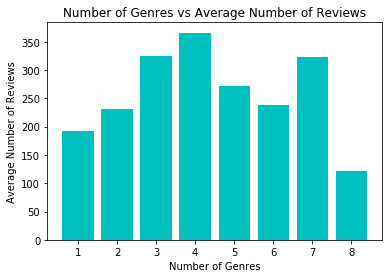

In [19]:
rev_mean = movie_data.groupby(by = "num_genres").num_reviews.mean()
print(rev_mean)
sub = rev_mean.to_frame(name = "mean_reviews").reset_index()

plt.bar(sub["num_genres"], sub["mean_reviews"], color = 'c')
plt.xlabel("Number of Genres")
plt.ylabel("Average Number of Reviews")
plt.title("Number of Genres vs Average Number of Reviews")

__Analysis__: There seems to be a trend where average number of reviews increases as the number of genres increase and peak at 4. After 4 genres, the average number of reviews tends to decrease except for at 7 genres where it rises again. 

num_genres
1     49677.939394
2     70207.178669
3     96394.260401
4    104736.183417
5     90095.992958
6     80553.734375
7    108403.875000
8     32669.500000
Name: users_voted, dtype: float64


Text(0.5,1,'Number of Genres vs Average Number of Voters')

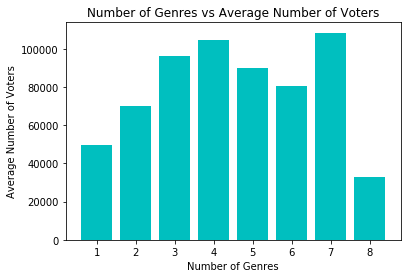

In [20]:
vote_mean = movie_data.groupby(by = "num_genres").users_voted.mean()
print(vote_mean)
vote_data = vote_mean.to_frame(name = "mean_voters").reset_index()

plt.bar(vote_data["num_genres"], vote_data["mean_voters"], color = 'c')
plt.xlabel("Number of Genres")
plt.ylabel("Average Number of Voters")
plt.title("Number of Genres vs Average Number of Voters")

__Analysis__: The data is similar to the number of genres vs average number of reviews. In this case, it appears that 7 genres exceeds the peak at 4 genres. 

__Boxplot of Number of Genres vs Rankings__

I am looking at the distributions of rankings with each number of genres. 

/Applications/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0,0.5,'Rankings')

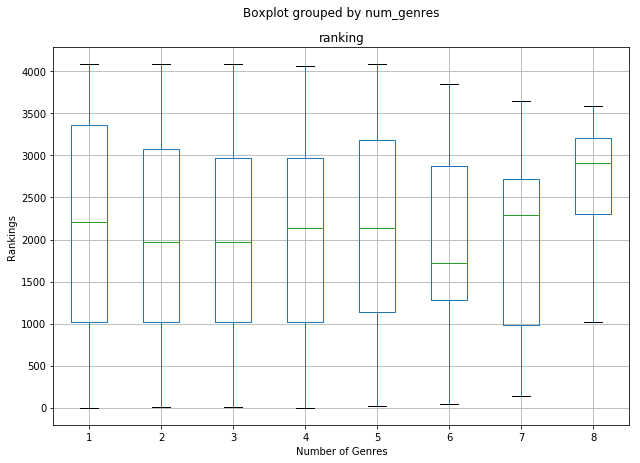

In [21]:
genre_rank = movie_data.boxplot(column = "ranking", by = "num_genres", figsize = (10, 7))
genre_rank.set_xlabel("Number of Genres")
genre_rank.set_ylabel("Rankings")

__Analysis__: The spread and median of rankings for the genres are very similar for the first 7 genres. The 8 genre entry has less spread and a lower median ranking. My data indicates that the number of genres does not necessarily influence the ranking of the movie, since all of them have similar distributions.

## Most Popular Movies
In this section, I will analyze the most popular movies by rating. 

In [22]:
title_mean = movie_data.groupby(by = "title").imdb_score.mean()
title_data = movie_data["title"].to_frame(name = "title").reset_index(drop = True)
title_data.head()

title_mean = title_mean.reindex(index = title_data["title"])
title_data["score"] = title_mean.values
title_data["rank"] = title_data.score.rank(ascending = False)
title_data.head()

copy_title = title_data.copy()
title_data = title_data[title_data["rank"] <=100]

In [23]:
top_5 = title_data[title_data["rank"]<=10]
top_5["title"].head()

title_mean = top_5.groupby(by = "rank")["score"].mean().to_frame(name = "score")
print("The top 5 scores: \n")
print(title_mean)

The top 5 scores: 

      score
rank       
1.0     9.1
2.0     9.0
3.0     8.9
5.0     8.8
9.0     8.7


__Scatterplot of Rank vs Score in the top 100__

Text(0.5,1,'Rank vs Score')

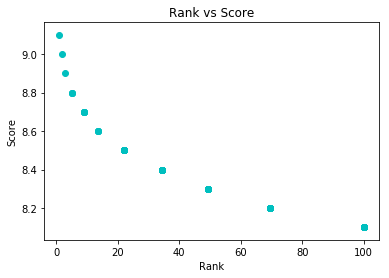

In [24]:
plt.scatter(title_data["rank"], title_data["score"], color = 'c');
plt.xlabel("Rank")
plt.ylabel("Score")
plt.title("Rank vs Score")
# plt.savefig('rankvscore1.pdf')

__Analysis__: It appears there is a trend as ranking increases, the score decreases. 

__Scatter Plot of All Rankings and Scores__

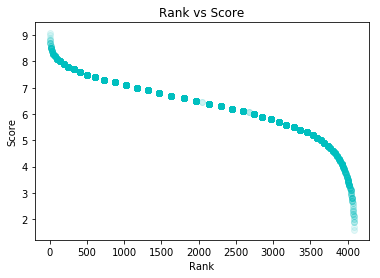

In [25]:
plt.scatter(copy_title["rank"], copy_title["score"], alpha = 0.1, color = 'c');
plt.xlabel("Rank")
plt.ylabel("Score")
plt.title("Rank vs Score")
plt.savefig('rankvsscore2.png')

__Analysis__: There is a nonlinear relationship betweeen rank and score. As ranking decreases, the score drops at very fast rate, but flattens out over the ranks in the middle of the set. As the ranks approach the lowest ranks, the score drops at a very fast rate again. This suggests a relationship between rankings and ratings.  

__Performing T-test for Less than 100 and greater than 100__

In [26]:
rank_mean = copy_title["rank"].mean()
above = copy_title[copy_title["rank"]<=100]
below = copy_title[copy_title["rank"]>= 100]

ttest = stats.ttest_ind(below["score"],above["score"])
print(ttest)
print("t-value:{:.2f}".format(ttest[0]))
print("p-value:{}".format(ttest[1]))

Ttest_indResult(statistic=-20.59346074686133, pvalue=8.95091387808352e-90)
t-value:-20.59
p-value:8.95091387808352e-90


__Analysis__: Since the t-value > the t value in the table, 1.98, at an alpha level 0.05, p < 0.05 and the results are significant. We can conclude that there is a significant difference in mean scores between the top 100 rankings and all the other movies. 

## Most Common Directors
I will examine the scores of the most frequently appeared directors and see if there is a relationship between frequency and popularity of the movies produced.

__Bar Graph of Most Common Directors and their Frequencies__

In [27]:
director_mean = movie_data.groupby(by = "director").imdb_score.mean()
print(director_mean)
director_data = movie_data["director"].value_counts().to_frame(name = "frequency").reset_index()
director_data = director_data.rename(columns = {"index":"director"})
director_mean = director_mean.reindex(index = director_data["director"])
director_data["score"] = director_mean.values
copy_director = director_data.copy()
director_data.head()

director
A. Raven Cruz         1.9
Aaron Hann            6.0
Aaron Schneider       7.1
Aaron Seltzer         2.7
Abel Ferrara          6.6
                     ... 
Zoran Lisinac         7.1
Álex de la Iglesia    6.1
Émile Gaudreault      6.7
Éric Tessier          6.6
Étienne Faure         4.3
Name: imdb_score, Length: 2104, dtype: float64


,director,frequency,score
0,Steven Soderbergh,15,6.673333
1,Woody Allen,15,6.893333
2,Clint Eastwood,15,7.193333
3,Steven Spielberg,15,7.273333
4,Ridley Scott,14,6.921429


Text(0.5,1,'Most Common Directors')

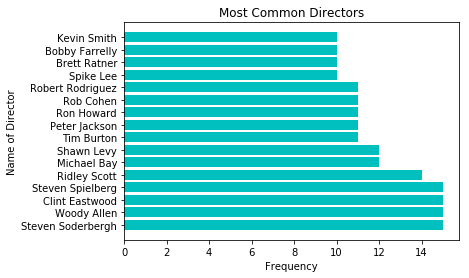

In [28]:
## Getting directors who appeared most frequently
director_data = director_data[director_data["frequency"]>= 10]
plt.barh(director_data["director"], director_data["frequency"], color = 'c');
plt.ylabel("Name of Director")
plt.xlabel("Frequency")
plt.title("Most Common Directors")

__Bar Graph of the Scores of the Most Common Directors__

Text(0,0.5,'Name of Director')

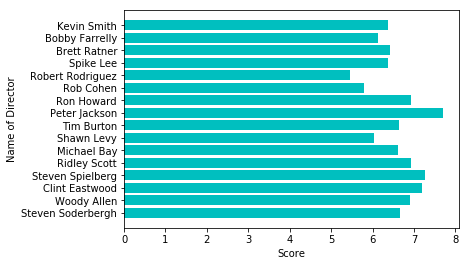

In [29]:
plt.barh(director_data["director"], director_data["score"], color = 'c');
plt.xlabel("Score")
plt.ylabel("Name of Director")

__Analysis__: There does not appear to be a relationship between the frequency of the director and the score of the director.

__Adding Rank Column__

In [30]:
copy_director["rank"] = copy_director["score"].rank(ascending = False)
copy_director.head()

,director,frequency,score,rank
0,Steven Soderbergh,15,6.673333,783.0
1,Woody Allen,15,6.893333,613.0
2,Clint Eastwood,15,7.193333,363.0
3,Steven Spielberg,15,7.273333,292.0
4,Ridley Scott,14,6.921429,551.0


__Scatter Plot of Rank and Movie Score__

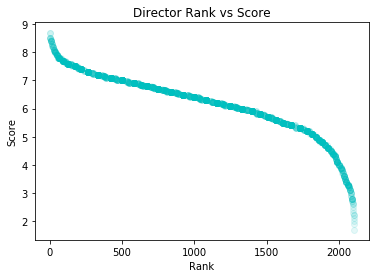

In [31]:
plt.scatter(copy_director["rank"], copy_director["score"], alpha = 0.1, color = 'c')
plt.xlabel("Rank")
plt.ylabel("Score")
plt.title("Director Rank vs Score")
plt.savefig('directorrankvsscore.png')

__Analysis__: The rank vs score of the director shows a similar relationship to the rank vs score of the movie. As the rank increases, the director score rapidly decreases and decreases gradually around the middle ranks. As the ranks get closer to the lower ranks, the score of the director's movie rapidly decreases. 

## Most Common Actors

__Function for Actor Information__

In [32]:
def actor_info(col):
    """
    Creates the dataframe of actor data, including actor name, frequency, and score as columns. 
    
    Parameters: col is a column
    Precondition: col is a Series
    """
    actor_mean = movie_data.groupby(by = col).imdb_score.mean()
    actor_data = movie_data[col].value_counts().to_frame(name = "frequency").reset_index()
    actor_data = actor_data.rename(columns = {"index":"actor"})
    actor_mean = actor_mean.reindex(index = actor_data["actor"])
    actor_data["score"] = actor_mean.values
    return actor_data

__Actor 1 Analysis__

In [33]:
# Create a dataframe for actor 1
actor_1_data = actor_info("actor_1_name")
actor_1_data.head()

,actor,frequency,score
0,Robert De Niro,35,6.302857
1,Johnny Depp,33,6.600000
2,J.K. Simmons,31,6.674194
3,Matt Damon,29,7.010345
4,Nicolas Cage,29,6.055172


__Bar Graph for Most Common Actor 1__

This graph is frequency vs the name of the actor and how many times they appeared.

Text(0.5,1,'Most Common Actor 1')

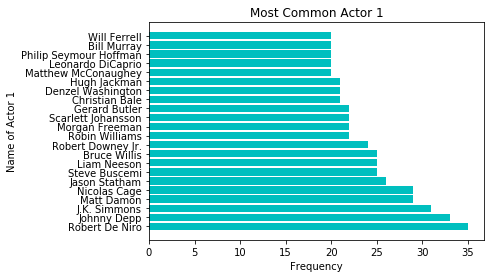

In [34]:
actor_1_data = actor_1_data[actor_1_data["frequency"]>= 20]
plt.barh(actor_1_data["actor"], actor_1_data["frequency"], color = 'c');
plt.ylabel("Name of Actor 1")
plt.xlabel("Frequency")
plt.title("Most Common Actor 1")

__Bar Graph for Scores for Most Common Actor 1__

Text(0.5,1,'Most Common Actor 1 vs Score')

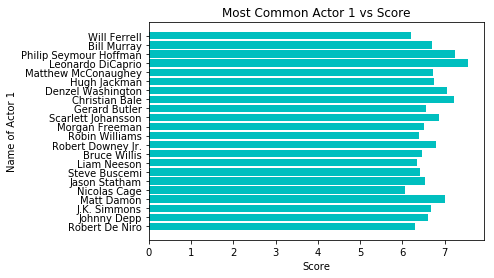

In [35]:
plt.barh(actor_1_data["actor"], actor_1_data["score"], color = 'c');
plt.ylabel("Name of Actor 1")
plt.xlabel("Score")
plt.title("Most Common Actor 1 vs Score")

__Analysis__: There does not seem to be a relationship between the frequency of the actor and the average score of their movies.

__Scatter Plot for Scores of Most Common Actor 1__

Text(0.5,1,'Frequency vs Score')

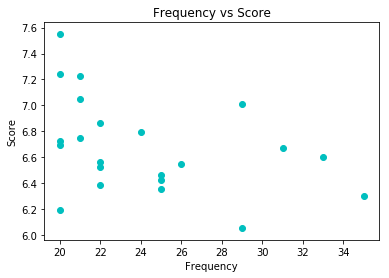

In [36]:
plt.scatter(actor_1_data["frequency"], actor_1_data["score"], color = 'c');
plt.xlabel("Frequency")
plt.ylabel("Score")
plt.title("Frequency vs Score")

In [37]:
freq_score_p = actor_1_data["frequency"].corr(actor_1_data["score"], method = "pearson")
freq_score_s = actor_1_data["frequency"].corr(actor_1_data["score"], method = "spearman")
freq_score_cov = actor_1_data["frequency"].cov(actor_1_data["score"])
print("Pearson Correlation: {:.2f}".format(freq_score_p))
print("Spearman Correlation: {:.2f}".format(freq_score_s))
print("Covariance: {:.2f}".format(freq_score_cov))

Pearson Correlation: -0.39
Spearman Correlation: -0.45
Covariance: -0.65


__Analysis__: The data shows a weak negative relationship between frequency and score of the actors. The covariance is also low, indicating low correlation.

## Actor 2

__Actor 2 Analysis__

In [38]:
# Create actor 2 dataframe 
actor_2_data = actor_info("actor_2_name")
actor_2_data.head()


,actor,frequency,score
0,Morgan Freeman,15,6.813333
1,Charlize Theron,15,6.680000
2,Brad Pitt,12,7.016667
3,James Franco,11,6.636364
4,Adam Sandler,10,5.780000


__Bar Graph for Most Common Actor 2__

Text(0.5,1,'Most Common Actor 2')

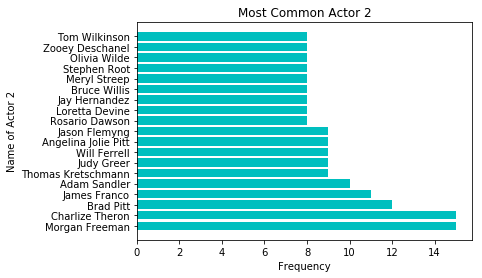

In [39]:
actor_2_data = actor_2_data[actor_2_data["frequency"]> 7]
plt.barh(actor_2_data["actor"], actor_2_data["frequency"], color = "c");
plt.ylabel("Name of Actor 2")
plt.xlabel("Frequency")
plt.title("Most Common Actor 2")

__Bar Graph of Scores for Most Common Actor 2__

Text(0.5,1,'Most Common Actor 2 vs Score')

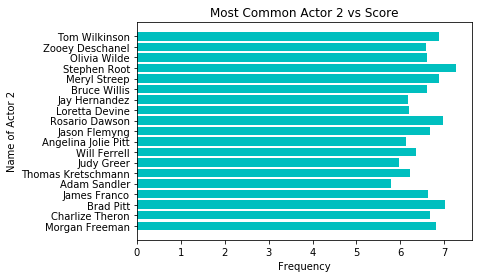

In [40]:
plt.barh(actor_2_data["actor"], actor_2_data["score"], color = 'c')
plt.ylabel("Name of Actor 2")
plt.xlabel("Frequency")
plt.title("Most Common Actor 2 vs Score")

__Scatter Plot of Scores for Most Common Actor 2__

Text(0.5,1,'Frequency vs Score')

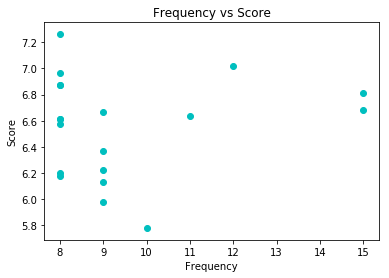

In [41]:
plt.scatter(actor_2_data["frequency"], actor_2_data["score"], color = 'c');
plt.ylabel("Score")
plt.xlabel("Frequency")
plt.title("Frequency vs Score")

In [42]:
freq2_score_p = actor_2_data["frequency"].corr(actor_2_data["score"], method = "pearson")
freq2_score_s = actor_2_data["frequency"].corr(actor_2_data["score"], method = "spearman")
freq2_score_cov = actor_2_data["frequency"].cov(actor_2_data["score"])
print("Pearson Correlation: {:.2f}".format(freq2_score_p))
print("Spearman Correlation: {:.2f}".format(freq2_score_s))
print("Covariance: {:.2f}".format(freq2_score_cov))

Pearson Correlation: 0.13
Spearman Correlation: -0.05
Covariance: 0.11


__Analysis__: For the secondary actor, there is even less correlation than the correlations between commonb actor 1's and score. The pearson correlation is 0.13 and the Spearman Correlation is -0.05. There is very weak correlation between actor 2 frequency and score.

## Actor 3

__Actor 3 Analysis__

In [43]:
# Creating dataframe for actor 3
actor_3_data = actor_info("actor_3_name")
actor_3_data.head()

,actor,frequency,score
0,Steve Coogan,8,6.112500
1,Ben Mendelsohn,7,6.271429
2,Stephen Root,7,6.171429
3,Anne Hathaway,7,6.700000
4,Shawn Hatosy,6,6.383333


__Bar Graph of Most Common Actor 3__

Text(0.5,1,'Most Common Actor 3')

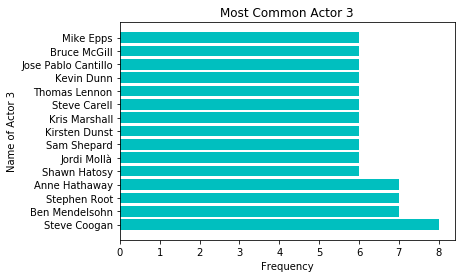

In [44]:
actor_3_data = actor_3_data[actor_3_data["frequency"]>5]
plt.barh(actor_3_data["actor"], actor_3_data["frequency"], color = "c");
plt.ylabel("Name of Actor 3")
plt.xlabel("Frequency")
plt.title("Most Common Actor 3")

__Bar Graph of Scores for Most Common Actor 3__

Text(0.5,1,'Most Common Actor 3 vs Score')

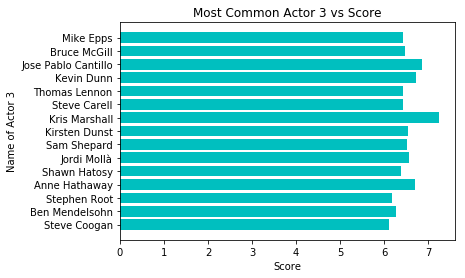

In [45]:
plt.barh(actor_3_data["actor"], actor_3_data["score"], color = 'c')
plt.xlabel("Score")
plt.ylabel("Name of Actor 3")
plt.title("Most Common Actor 3 vs Score")

__Scatter Plot of Scores for Most Common Actor 3__

Text(0.5,1,'Frequency vs Scores')

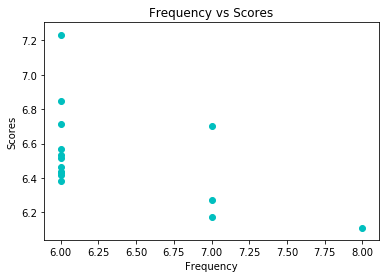

In [46]:
plt.scatter(actor_3_data["frequency"], actor_3_data["score"], color = 'c');
plt.xlabel("Frequency")
plt.ylabel("Scores")
plt.title("Frequency vs Scores")

In [47]:
freq3_score_p = actor_3_data["frequency"].corr(actor_3_data["score"], method = "pearson")
freq3_score_s = actor_3_data["frequency"].corr(actor_3_data["score"], method = "spearman")
freq3_score_cov = actor_3_data["frequency"].cov(actor_3_data["score"])
print("Pearson Correlation: {:.2f}".format(freq3_score_p))
print("Spearman Correlation: {:.2f}".format(freq3_score_s))
print("Covariance: {:.2f}".format(freq3_score_cov))

Pearson Correlation: -0.51
Spearman Correlation: -0.52
Covariance: -0.09


__Analysis__: The correlation became greater in the negative direction, which indicates that as frequency of actor 3 increases, the score decreases. Intuitively, the frequency should increase, so from actor 1 to actor 2 to actor 3, the correlations and covariances have been decreasing. While there is not a strong correlation within the actors, the data indicates that the main actor 1 may have more impact on the scores than the second and third leads. 

## Heat Map of Correlations
I created a heat map of correlations between the data columns of the original dataframe. 

                 year  duration  imdb_score  num_reviews  users_voted  \
year         1.000000 -0.031579   -0.054608    -0.118755     0.002288   
duration    -0.031579  1.000000    0.338410     0.416388     0.394144   
imdb_score  -0.054608  0.338410    1.000000     0.305392     0.425407   
num_reviews -0.118755  0.416388    0.305392     1.000000     0.805716   
users_voted  0.002288  0.394144    0.425407     0.805716     1.000000   
num_genres  -0.037751  0.092208    0.035441     0.103724     0.107221   
ranking      0.048910 -0.342261   -0.951981    -0.312192    -0.430487   

             num_genres   ranking  
year          -0.037751  0.048910  
duration       0.092208 -0.342261  
imdb_score     0.035441 -0.951981  
num_reviews    0.103724 -0.312192  
users_voted    0.107221 -0.430487  
num_genres     1.000000 -0.017911  
ranking       -0.017911  1.000000  


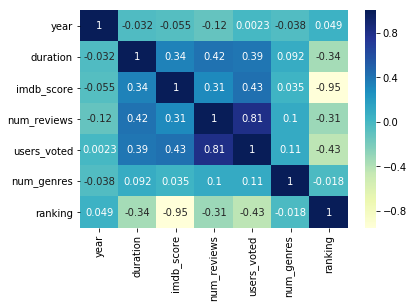

In [48]:
import seaborn as sns
corr = movie_data.corr()
print(corr)
sns.heatmap(corr, annot = True, cmap="YlGnBu")
plt.show()